# Análise exploratória dos atributos categóricos

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, chi2
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
np.random.seed(777)

df = pd.read_csv('../data/students.csv')

X = df.loc[:, df.columns != 'Target']
y = df['Target']

In [43]:
nominal = ['Marital status', 
            'Application mode', 
            'Course',
            'Daytime/evening attendance', 
            'Previous qualification', 
            'Nacionality',
            'Mother\'s qualification', 
            'Father\'s qualification',
            'Mother\'s occupation', 
            'Father\'s occupation', 
            'Displaced',
            'Educational special needs', 
            'Debtor', 
            'Tuition fees up to date',
            'Gender', 
            'Scholarship holder', 
            'International',]        

ordinais = ['Application order']  

## Nominais

In [44]:
X_n = X[nominal]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, train_size=0.8, stratify=y, random_state=777)

In [94]:
def chi2_hypotesis_test(df: pd.DataFrame, var1: str, var2: str, alpha: float = .05, show_table: bool = True) -> tuple[bool, int]:
    """
    Verfica se ha ou nao uma associacao significativa entre as variaveis fornecidas aplicando o teste chi2
    em uma tabela de contigencia das duas variaveis (a tabela e exibida caso show_table for True).

    :param df: DataFrame alvo do teste
    :df type: pd.DataFrame
    :param var1: Nome da coluna do DataFrame que contem a primeira variavel de interesse
    :var1 type: str
    :param var2: Nome da coluna do DataFrame que contem a segunda variavel de interesse
    :var2 type: str
    :param alpha: Nivel de significacao estatistica escolhida, padrao = 0.05
    :alpha type: float
    :param show_table: Parametro que define se a tabela de contigencia deve ser exibida, padrao = True
    :show_table type: bool
    :return: Retorna uma tupla com True se a hipotese nula e verdadeira, False caso contrario e o valor normalizado do chi2.
    :rtype: Tuple[bool, int]
    """

    contigency_tab = pd.crosstab(df[var1], df[var2])

    if show_table:
        plt.figure(figsize=(4,4))
        sns.heatmap(contigency_tab, annot=True, cmap='viridis', fmt='.0f')
        plt.title(f'{var1} X {var2} Contigency Table')
        plt.show()

    chi2_stat, _, dof, _ = chi2_contingency(contigency_tab)
    critical_value = chi2.ppf(1 - alpha, dof)
    n = contigency_tab.sum().sum()
    r, c = contigency_tab.shape
    v_cramer = np.sqrt(chi2_stat / (n * min((r-1), (c-1))))

    return chi2_stat > critical_value, v_cramer

In [101]:
var2 = 'Target'

rejected = []
confirmed = []
v_cramer_list = []

df_train = pd.concat([X_train, y_train], axis=1)

for v1 in X_train.columns:
    print(f'{v1} X {var2}')
    result, v_cramer = chi2_hypotesis_test(df_train, v1, var2, show_table=False)
    v_cramer_list.append((v1, v_cramer))
    if result:
        print(f'A hipótese nula foi rejeitada.\n')
        rejected.append(v1)
    else:
        print(f'Não há evidências suficientes para rejeitar a hipótese nula.\n')
        confirmed.append(v1)

Marital status X Target
A hipótese nula foi rejeitada.

Application mode X Target
A hipótese nula foi rejeitada.

Course X Target
A hipótese nula foi rejeitada.

Daytime/evening attendance X Target
A hipótese nula foi rejeitada.

Previous qualification X Target
A hipótese nula foi rejeitada.

Nacionality X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Mother's qualification X Target
A hipótese nula foi rejeitada.

Father's qualification X Target
A hipótese nula foi rejeitada.

Mother's occupation X Target
A hipótese nula foi rejeitada.

Father's occupation X Target
A hipótese nula foi rejeitada.

Displaced X Target
A hipótese nula foi rejeitada.

Educational special needs X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Debtor X Target
A hipótese nula foi rejeitada.

Tuition fees up to date X Target
A hipótese nula foi rejeitada.

Gender X Target
A hipótese nula foi rejeitada.

Scholarship holder X Target
A hipótese nula foi rejeitada.

Inte

In [103]:
print(v_cramer_list)

[('Marital status', 0.08722217193360919), ('Application mode', 0.2270839925968637), ('Course', 0.25131886463929654), ('Daytime/evening attendance', 0.07559078122826753), ('Previous qualification', 0.15765829908066842), ('Nacionality', 0.07541917640413068), ("Mother's qualification", 0.1609772225397259), ("Father's qualification", 0.15876542912065553), ("Mother's occupation", 0.18877940456482412), ("Father's occupation", 0.1795832617128476), ('Displaced', 0.11714024689006727), ('Educational special needs', 0.019625310292873455), ('Debtor', 0.2370660960804527), ('Tuition fees up to date', 0.4284584767944099), ('Gender', 0.226984434736239), ('Scholarship holder', 0.3058671439436553), ('International', 0.025577378647892682)]


max nomr_chi2 ('Tuition fees up to date', 0.4284584767944099)
['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']
['Nacionality', 'Educational special needs', 'International']


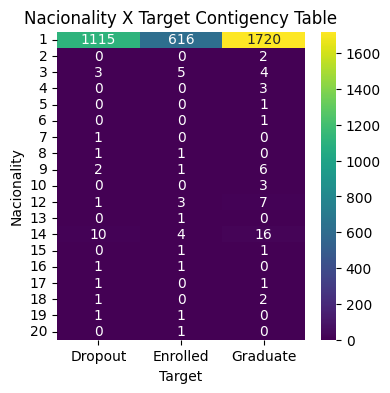

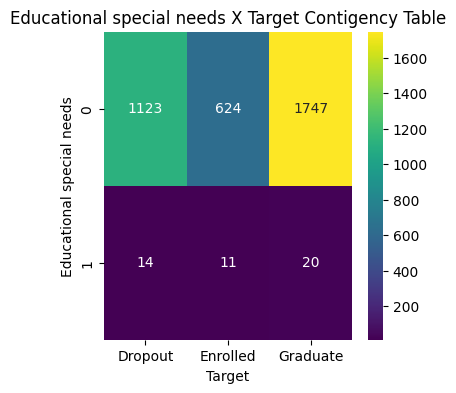

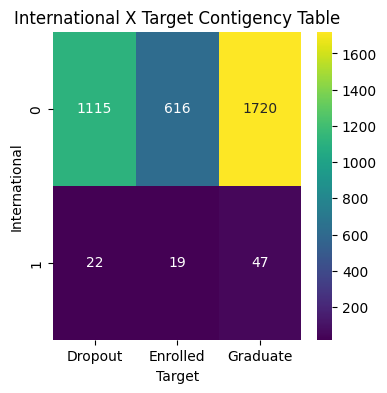

In [102]:
print('max nomr_chi2', max(v_cramer_list))
print(rejected)
print(confirmed)

for c in confirmed:
    chi2_hypotesis_test(df_train, c, 'Target')

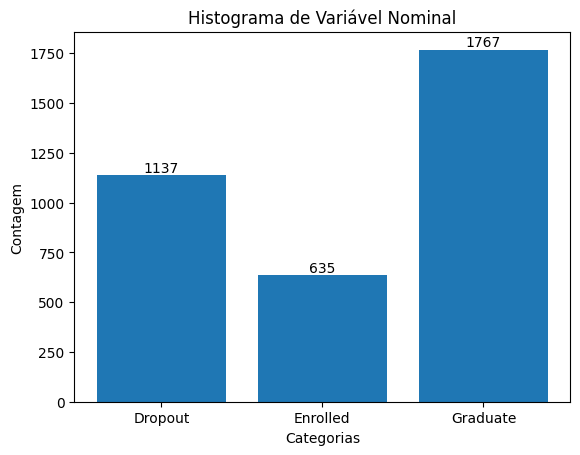

In [108]:
ordem_especifica = ['Dropout', 'Enrolled', 'Graduate']

contagem = {}
for categoria in df_train['Target']:
    contagem[categoria] = contagem.get(categoria, 0) + 1

# Reorganizar as categorias de acordo com a ordem específica
categorias_ordenadas = [categoria for categoria in ordem_especifica if categoria in contagem]
contagem_ordenada = [contagem[c] for c in categorias_ordenadas]

# Plotar o histograma
plt.bar(categorias_ordenadas, contagem_ordenada)

# Adicionar rótulos e título
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.title('Histograma de Variável Nominal')

for i, count in enumerate(contagem_ordenada):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Exibir o gráfico
plt.show()


## Conclusão

Optamos por remover as colunas 'Nacionality', 'Educational special needs', 'International' por não agregarem muito para a nossa modelagem e para reduzr a dimensionalidade do problema.